In [132]:
import seaborn as snb
import matplotlib.pyplot as plt

In [133]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'./tweets_2019_lite.csv',
                 lineterminator='\n')
df.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1080847344629878785,2019-01-03 15:24:22+00:00,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45+00:00,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541
1,1080845616920625152,2019-01-03 15:17:30+00:00,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37+00:00,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0
2,1080845503305342977,2019-01-03 15:17:03+00:00,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35+00:00,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482
3,1080844507501846530,2019-01-03 15:13:06+00:00,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11+00:00,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354
4,1080844257844449283,2019-01-03 15:12:06+00:00,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34+00:00,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94346 entries, 0 to 94345
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_str                   94346 non-null  int64 
 1   created_at               94346 non-null  object
 2   full_text                94346 non-null  object
 3   user.id_str              94346 non-null  int64 
 4   user.screen_name         94346 non-null  object
 5   user.name                94339 non-null  object
 6   user.created_at          94346 non-null  object
 7   user.description         85110 non-null  object
 8   user.profile_image_url   94341 non-null  object
 9   user.profile_banner_url  85247 non-null  object
 10  user.url                 38894 non-null  object
 11  user.statuses_count      94346 non-null  int64 
 12  user.followers_count     94346 non-null  int64 
 13  user.friends_count       94346 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1

In [135]:
df["user.created_at"] = df["user.created_at"].astype(str).str.split("+").str[0]
df["created_at"] = df["created_at"].astype(str).str.split("+").str[0]

In [136]:
my_format = '%Y-%m-%d %H:%M:%S'
df['user.created_at'] = pd.to_datetime(df['user.created_at'], format=my_format)
df['created_at'] = pd.to_datetime(df['created_at'], format=my_format)

In [137]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(df)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
0,1080847344629878785,2019-01-03 15:24:22,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541,2019-01-03,15:24:22,2017-07-23,15:56:45
1,1080845616920625152,2019-01-03 15:17:30,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0,2019-01-03,15:17:30,2018-04-28,12:26:37
2,1080845503305342977,2019-01-03 15:17:03,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482,2019-01-03,15:17:03,2014-05-07,17:23:35
3,1080844507501846530,2019-01-03 15:13:06,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354,2019-01-03,15:13:06,2009-05-31,21:20:11
4,1080844257844449283,2019-01-03 15:12:06,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5,2019-01-03,15:12:06,2015-08-17,14:07:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94341,1204114101737336833,2019-12-09 19:02:27,Amber Heard https://t.co/EB64SipBiF https://t....,1023908146006421504,Hollyantra,Beautiful Hollywood,2018-07-30 12:28:20,NaN,http://pbs.twimg.com/profile_images/1023909265...,NaN,NaN,19677,119,4,2019-12-09,19:02:27,2018-07-30,12:28:20
94342,1204111817489952768,2019-12-09 18:53:23,Amber Heard https://t.co/BUI140zTLj,479610523,GentIemanLadies,Gentleman's Ladies,2012-01-31 15:33:07,Pictures of your favorite women ♥\nStay Classy!,http://pbs.twimg.com/profile_images/1252762363...,https://pbs.twimg.com/profile_banners/47961052...,https://t.co/IEe9i8FFna,65158,86273,0,2019-12-09,18:53:23,2012-01-31,15:33:07
94343,1204106778578956288,2019-12-09 18:33:21,Cuando los de DC decidieron juntar en el casti...,701861226352087045,Harley_RatedR,E 🏳️‍🌈,2016-02-22 20:08:51,"It's all just a cosmic joke 🏳️‍🌈 Ay amore, la ...",http://pbs.twimg.com/profile_images/1258042834...,https://pbs.twimg.com/profile_banners/70186122...,NaN,73291,432,140,2019-12-09,18:33:21,2016-02-22,20:08:51
94344,1204105029411586051,2019-12-09 18:26:24,Amber Heard #GentlemanBonner https://t.co/N1cJ...,4149920184,dudestuffSFW,Gentelman Boner,2015-11-06 21:11:12,NaN,http://pbs.twimg.com/profile_images/6627456057...,NaN,NaN,47834,3972,0,2019-12-09,18:26:24,2015-11-06,21:11:12


In [138]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['user_create_date'] = pd.to_datetime(df['user_create_date'])
df['user_create_time'] = pd.to_datetime(df['user_create_time'])

# Investigation about Tweets count over time

<AxesSubplot:>

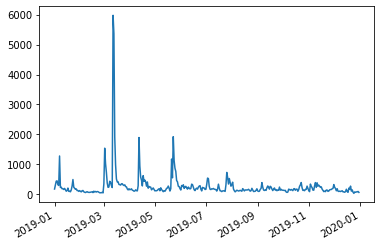

In [139]:
df['tweet_date'].value_counts().plot()

In [140]:
df['tweet_date'].value_counts()
df['tweet_date'].value_counts()

2019-03-12    5979
2019-03-13    5361
2019-05-23    1924
2019-03-14    1912
2019-04-12    1895
              ... 
2019-02-26      50
2019-02-25      49
2019-02-24      49
2019-02-28      44
2019-12-25      29
Name: tweet_date, Length: 365, dtype: int64

In [141]:
df['tweet_date'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
94341    12
94342    12
94343    12
94344    12
94345    12
Name: tweet_date, Length: 94346, dtype: int64

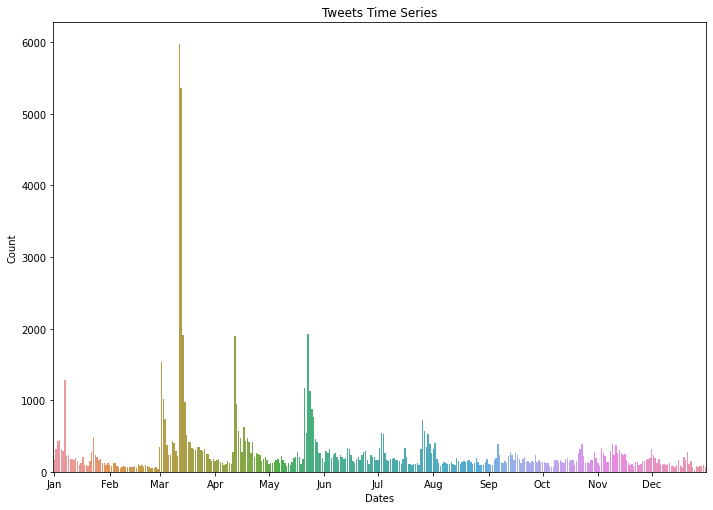

In [142]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = df)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

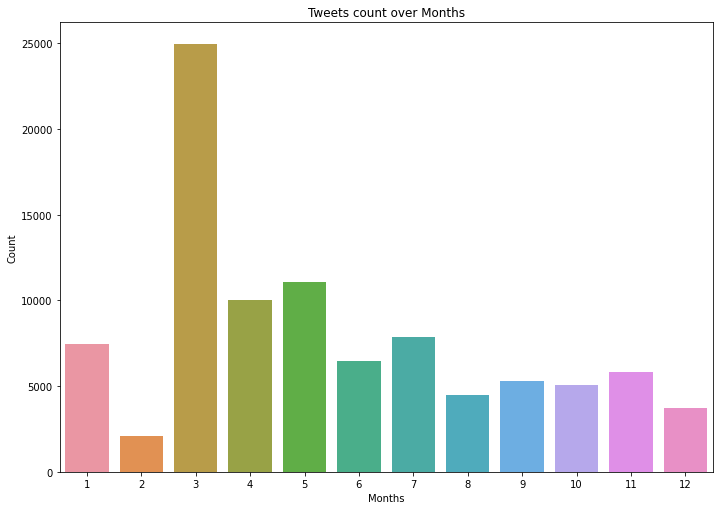

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.month, data = df)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Tweets count over Months')
plt.show()

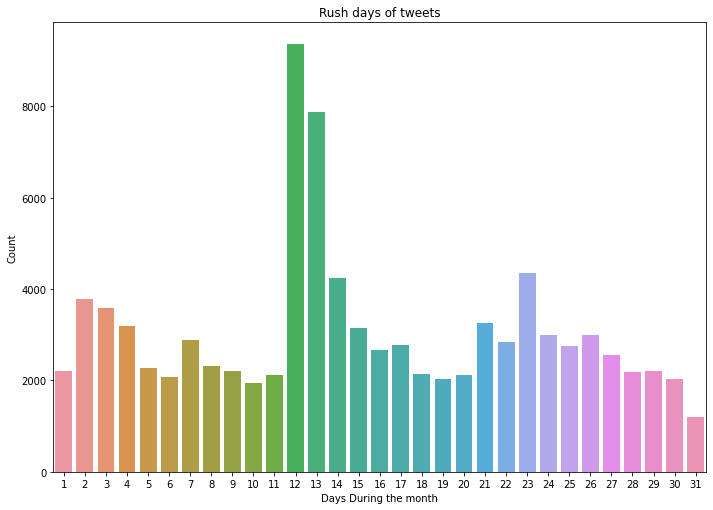

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

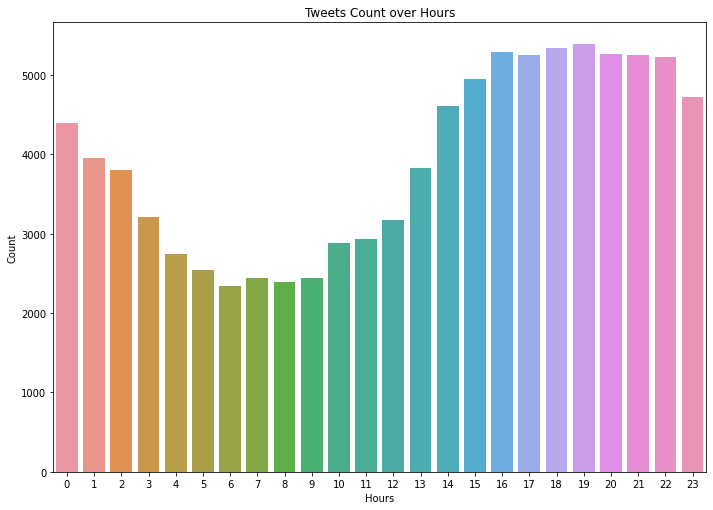

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_time'].dt.hour, data = df)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Tweets Count over Hours')
plt.show()

# Investigation on users Created Over Time

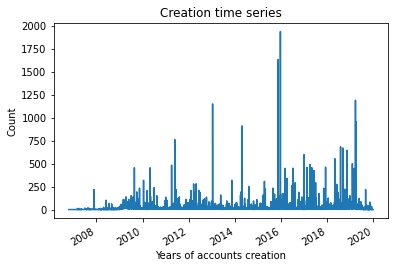

In [146]:
df['user_create_date'].value_counts().plot()
plt.xlabel('Years of accounts creation')
plt.ylabel('Count')
plt.title('Creation time series');

In [147]:
users_cre_19 = df[df['user_create_date'].dt.year == 2019]


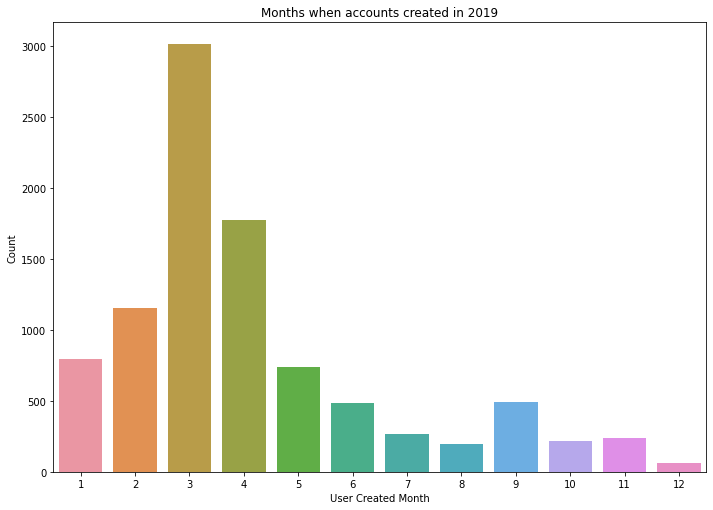

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['user_create_date'].dt.month, data = df)
plt.xlabel('User Created Month')
plt.ylabel('Count')
plt.title('Months when accounts created in 2019')
plt.show()

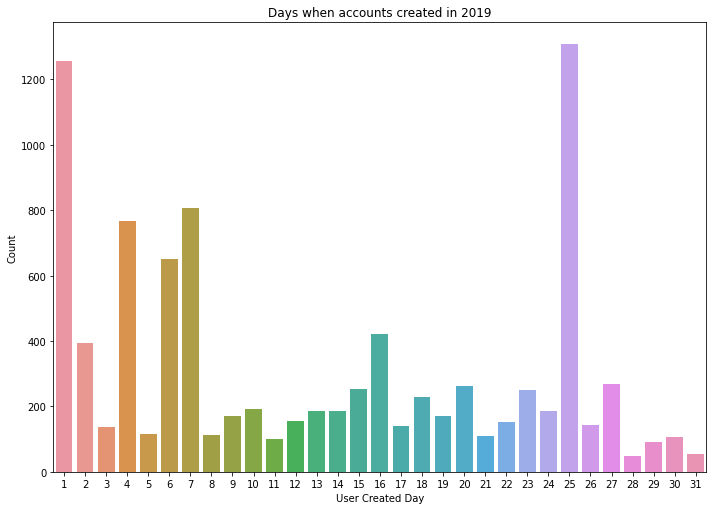

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['user_create_date'].dt.day, data = df)
plt.xlabel('User Created Day')
plt.ylabel('Count')
plt.title('Days when accounts created in 2019')

plt.show()

# Investigate tweets of Users created at 2019 

In [150]:
users_cre_19

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,NaN,21,6,67,2019-01-03,2021-06-29 09:28:23,2019-01-02,2021-06-29 14:49:31
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,NaN,289,0,2,2019-01-03,2021-06-29 12:27:40,2019-01-03,2021-06-29 10:26:23
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:57:43,2019-01-03,2021-06-29 04:03:07
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:55:15,2019-01-03,2021-06-29 04:03:07
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,NaN,12,45,359,2019-01-16,2021-06-29 17:47:58,2019-01-16,2021-06-29 15:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94298,1204081255815548930,2019-12-09 16:51:56,DC Entertainment: Remove Amber Heard from Aqua...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-09,2021-06-29 16:51:56,2019-12-04,2021-06-29 13:19:41
94301,1203946200254296064,2019-12-09 07:55:17,Amber Heard's father threatens to shoot Johnny...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-09,2021-06-29 07:55:17,2019-12-04,2021-06-29 13:19:41
94316,1204060271809093633,2019-12-09 15:28:33,#JusticeForJohnnyDepp\nS'alright mate...we're ...,1184602047620046849,TheLittleWater1,🍩 Water One 🍩,2019-10-16 22:48:42,🍩 Phucksticks Aficionado Writer 🍩\n#johnnydepp...,http://pbs.twimg.com/profile_images/1210011816...,https://pbs.twimg.com/profile_banners/11846020...,NaN,307,314,962,2019-12-09,2021-06-29 15:28:33,2019-10-16,2021-06-29 22:48:42
94321,1203868686878199808,2019-12-09 02:47:16,Monster is Amber Heard !! She is Scum ! A medi...,1191963623708594176,EloisaNieves1,Eloisa Nieves,2019-11-06 06:21:18,I make music 🎶 I’m vocal coach! #JusticeforJoh...,http://pbs.twimg.com/profile_images/1330941089...,https://pbs.twimg.com/profile_banners/11919636...,NaN,21685,299,215,2019-12-09,2021-06-29 02:47:16,2019-11-06,2021-06-29 06:21:18


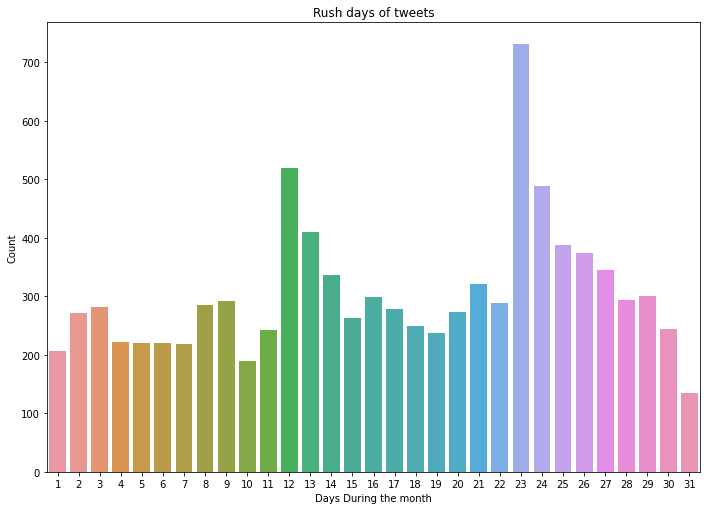

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

In [152]:
users_cre_19['diff'] = abs(users_cre_19['user.created_at'] - users_cre_19['created_at'])
users_cre_19["days_diff"] = users_cre_19["diff"].astype(str).str.split(" ").str[0]
users_cre_19["time_diff"] = users_cre_19["diff"].astype(str).str.split(" ").str[2]
users_cre_19.drop(['diff'], axis=1, inplace=True)
users_cre_19['time_diff'] = pd.to_datetime(users_cre_19['time_diff'])
users_cre_19['days_diff'] = users_cre_19['days_diff'].astype(int)
users_cre_19

<ipython-input-152-aef5f9f3322e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_cre_19['diff'] = abs(users_cre_19['user.created_at'] - users_cre_19['created_at'])
<ipython-input-152-aef5f9f3322e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_cre_19["days_diff"] = users_cre_19["diff"].astype(str).str.split(" ").str[0]
<ipython-input-152-aef5f9f3322e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,NaN,21,6,67,2019-01-03,2021-06-29 09:28:23,2019-01-02,2021-06-29 14:49:31,0,2021-06-29 18:38:52
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,NaN,289,0,2,2019-01-03,2021-06-29 12:27:40,2019-01-03,2021-06-29 10:26:23,0,2021-06-29 02:01:17
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:57:43,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:54:36
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:55:15,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:52:08
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,NaN,12,45,359,2019-01-16,2021-06-29 17:47:58,2019-01-16,2021-06-29 15:17:45,0,2021-06-29 02:30:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94298,1204081255815548930,2019-12-09 16:51:56,DC Entertainment: Remove Amber Heard from Aqua...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-09,2021-06-29 16:51:56,2019-12-04,2021-06-29 13:19:41,5,2021-06-29 03:32:15
94301,1203946200254296064,2019-12-09 07:55:17,Amber Heard's father threatens to shoot Johnny...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-09,2021-06-29 07:55:17,2019-12-04,2021-06-29 13:19:41,4,2021-06-29 18:35:36
94316,1204060271809093633,2019-12-09 15:28:33,#JusticeForJohnnyDepp\nS'alright mate...we're ...,1184602047620046849,TheLittleWater1,🍩 Water One 🍩,2019-10-16 22:48:42,🍩 Phucksticks Aficionado Writer 🍩\n#johnnydepp...,http://pbs.twimg.com/profile_images/1210011816...,https://pbs.twimg.com/profile_banners/11846020...,NaN,307,314,962,2019-12-09,2021-06-29 15:28:33,2019-10-16,2021-06-29 22:48:42,53,2021-06-29 16:39:51
94321,1203868686878199808,2019-12-09 02:47:16,Monster is Amber Heard !! She is Scum ! A medi...,1191963623708594176,EloisaNieves1,Eloisa Nieves,2019-11-06 06:21:18,I make music 🎶 I’m vocal coach! #JusticeforJoh...,http://pbs.twimg.com/profile_images/1330941089...,https://pbs.twimg.com/profile_banners/11919636...,NaN,21685,299,215,2019-12-09,2021-06-29 02:47:16,2019-11-06,2021-06-29 06:21:18,32,2021-06-29 20:25:58


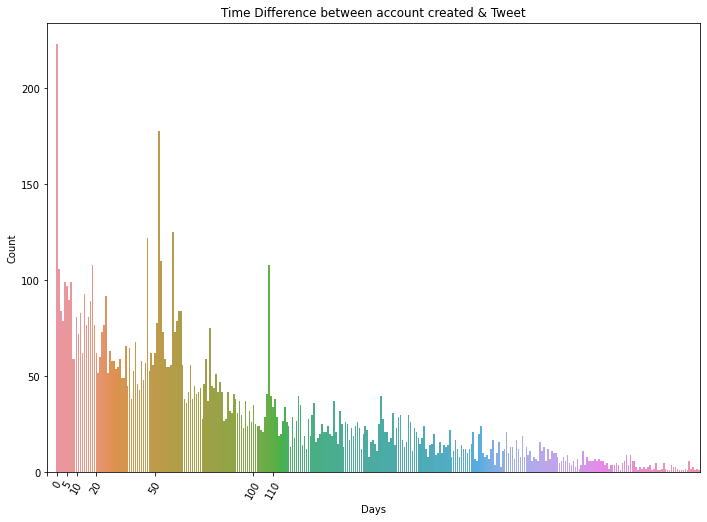

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'days_diff', data = users_cre_19)

plt.xticks([ -5, 0,5,10,20,50,100,110],rotation=60)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Time Difference between account created & Tweet')
plt.show()

In [154]:
users_cre_19['days_diff'].value_counts().sort_values()

315      1
287      1
326      1
324      1
308      1
      ... 
53     110
46     122
59     125
52     178
0      223
Name: days_diff, Length: 328, dtype: int64

In [155]:
users_Zero_19 = users_cre_19[users_cre_19['days_diff'] == 0]

<AxesSubplot:>

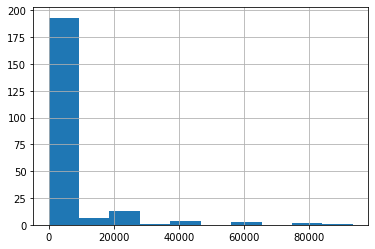

In [156]:
users_Zero_19['user.statuses_count'].hist()

In [157]:
users_Zero_19['time_diff_min'] = users_Zero_19['time_diff'].dt.hour * 60 + users_Zero_19['time_diff'].dt.minute
users_Zero_19

<ipython-input-157-8e7efe25ac3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_Zero_19['time_diff_min'] = users_Zero_19['time_diff'].dt.hour * 60 + users_Zero_19['time_diff'].dt.minute


,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,...,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff,time_diff_min
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,...,21,6,67,2019-01-03,2021-06-29 09:28:23,2019-01-02,2021-06-29 14:49:31,0,2021-06-29 18:38:52,1118
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,...,289,0,2,2019-01-03,2021-06-29 12:27:40,2019-01-03,2021-06-29 10:26:23,0,2021-06-29 02:01:17,121
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,...,73,3,28,2019-01-03,2021-06-29 04:57:43,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:54:36,54
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,...,73,3,28,2019-01-03,2021-06-29 04:55:15,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:52:08,52
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,...,12,45,359,2019-01-16,2021-06-29 17:47:58,2019-01-16,2021-06-29 15:17:45,0,2021-06-29 02:30:13,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92568,1202289896297259014,2019-12-04 18:13:43,Amber Heard's father threatens to shoot Johnny...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,...,313,2,4,2019-12-04,2021-06-29 18:13:43,2019-12-04,2021-06-29 13:19:41,0,2021-06-29 04:54:02,294
92574,1202220361179381761,2019-12-04 13:37:24,DC Entertainment: Remove Amber Heard from Aqua...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,...,313,2,4,2019-12-04,2021-06-29 13:37:24,2019-12-04,2021-06-29 13:19:41,0,2021-06-29 00:17:43,17
92581,1202046163790155776,2019-12-04 02:05:13,She is beautiful even in my doodles😊😊#Amber he...,1202020270661259264,TheAmberlove1,burner,2019-12-04 00:22:37,"I got it, Mello!! here it?? I got it..",http://pbs.twimg.com/profile_images/1202020549...,NaN,...,5,0,14,2019-12-04,2021-06-29 02:05:13,2019-12-04,2021-06-29 00:22:37,0,2021-06-29 01:42:36,102
92911,1211871017120878594,2019-12-31 04:45:40,8.Amber heard https://t.co/M9G4wj1wgU,1211556828175167488,furious_hannyeo,빡친한녀,2019-12-30 07:57:22,보통 빡친게 아님,http://pbs.twimg.com/profile_images/1211557373...,NaN,...,3422,11,306,2019-12-31,2021-06-29 04:45:40,2019-12-30,2021-06-29 07:57:22,0,2021-06-29 20:48:18,1248


In [158]:
users_Zero_19['Avg_tweet'] = users_Zero_19['user.statuses_count']/users_Zero_19['time_diff_min']
users_Zero_19

<ipython-input-158-36aa71ee52d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_Zero_19['Avg_tweet'] = users_Zero_19['user.statuses_count']/users_Zero_19['time_diff_min']


,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,...,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff,time_diff_min,Avg_tweet
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,...,6,67,2019-01-03,2021-06-29 09:28:23,2019-01-02,2021-06-29 14:49:31,0,2021-06-29 18:38:52,1118,0.018784
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,...,0,2,2019-01-03,2021-06-29 12:27:40,2019-01-03,2021-06-29 10:26:23,0,2021-06-29 02:01:17,121,2.388430
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,...,3,28,2019-01-03,2021-06-29 04:57:43,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:54:36,54,1.351852
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,...,3,28,2019-01-03,2021-06-29 04:55:15,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:52:08,52,1.403846
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,...,45,359,2019-01-16,2021-06-29 17:47:58,2019-01-16,2021-06-29 15:17:45,0,2021-06-29 02:30:13,150,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92568,1202289896297259014,2019-12-04 18:13:43,Amber Heard's father threatens to shoot Johnny...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,...,2,4,2019-12-04,2021-06-29 18:13:43,2019-12-04,2021-06-29 13:19:41,0,2021-06-29 04:54:02,294,1.064626
92574,1202220361179381761,2019-12-04 13:37:24,DC Entertainment: Remove Amber Heard from Aqua...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,...,2,4,2019-12-04,2021-06-29 13:37:24,2019-12-04,2021-06-29 13:19:41,0,2021-06-29 00:17:43,17,18.411765
92581,1202046163790155776,2019-12-04 02:05:13,She is beautiful even in my doodles😊😊#Amber he...,1202020270661259264,TheAmberlove1,burner,2019-12-04 00:22:37,"I got it, Mello!! here it?? I got it..",http://pbs.twimg.com/profile_images/1202020549...,NaN,...,0,14,2019-12-04,2021-06-29 02:05:13,2019-12-04,2021-06-29 00:22:37,0,2021-06-29 01:42:36,102,0.049020
92911,1211871017120878594,2019-12-31 04:45:40,8.Amber heard https://t.co/M9G4wj1wgU,1211556828175167488,furious_hannyeo,빡친한녀,2019-12-30 07:57:22,보통 빡친게 아님,http://pbs.twimg.com/profile_images/1211557373...,NaN,...,11,306,2019-12-31,2021-06-29 04:45:40,2019-12-30,2021-06-29 07:57:22,0,2021-06-29 20:48:18,1248,2.741987


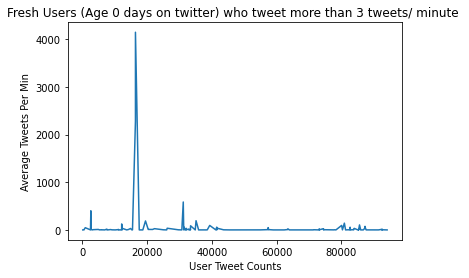

In [176]:
users_Zero_19['Avg_tweet'].plot()
plt.xlabel('User Tweet Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

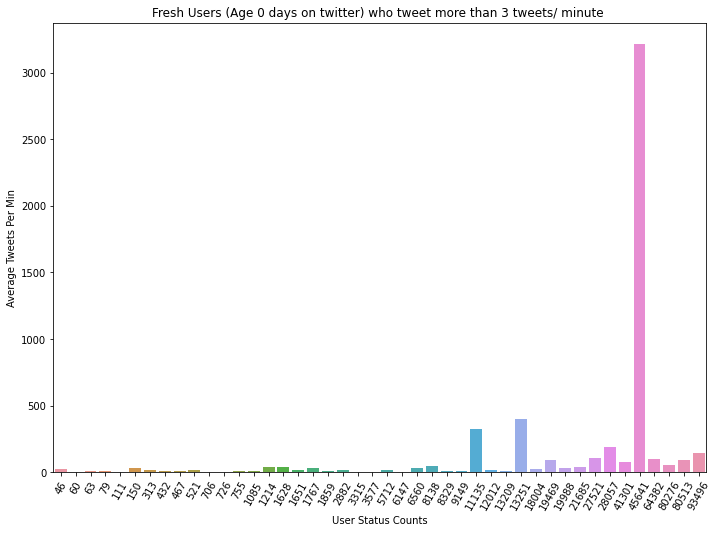

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.barplot(x = 'user.statuses_count',y='Avg_tweet', data = users_Zero_19[users_Zero_19['Avg_tweet'] >= 3],ci=None)
plt.xticks(rotation=60)

plt.xlabel('User Status Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

In [177]:
users_Zero_19[users_Zero_19['Avg_tweet'] >= 3]['user.screen_name'].value_counts()

EloisaNieves1      9
cherrymalk         6
samjrakoh          5
MandyFranceJD      3
SkLumos            3
clarksskents       2
jhnnyrdj           2
darkofvenus        2
PerennialVape      2
TheNamesQ          2
axelsbabeylamb     2
Sarah_Zarin        2
yourfavpaella      1
jcdipacino         1
pppthrnykl         1
Aliyah81467034     1
korayaydn_s        1
Annouki2           1
THCSLAVICSHADOW    1
blockedbyamber1    1
wesexualpeople     1
vindicatorsquad    1
capmwidow          1
xdiordepp          1
HeardSociopath     1
thenationroar_     1
SosiasAon          1
_manic_intent      1
eIevenriver        1
OwenMac01466773    1
maryfakhoury3      1
annballedos_       1
bloodybiebr        1
avatarjaz          1
Arbens7            1
chillomega         1
finnishtrends      1
FlixSony           1
heypeteypie        1
_ShattaBandle      1
brekkcrs           1
beatifulxdark      1
everyoneisabot1    1
dawrkphoenix       1
IstandbyJohnny     1
Name: user.screen_name, dtype: int64

In [161]:
users_cre_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9426 entries, 92 to 94332
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_str                   9426 non-null   int64         
 1   created_at               9426 non-null   datetime64[ns]
 2   full_text                9426 non-null   object        
 3   user.id_str              9426 non-null   int64         
 4   user.screen_name         9426 non-null   object        
 5   user.name                9424 non-null   object        
 6   user.created_at          9426 non-null   datetime64[ns]
 7   user.description         8372 non-null   object        
 8   user.profile_image_url   9424 non-null   object        
 9   user.profile_banner_url  8017 non-null   object        
 10  user.url                 2134 non-null   object        
 11  user.statuses_count      9426 non-null   int64         
 12  user.followers_count     9426 no

In [162]:
df_0 = users_cre_19[users_cre_19['days_diff'] == 0]
df_1 = users_cre_19[users_cre_19['days_diff'] == 1]
df_2 = users_cre_19[users_cre_19['days_diff'] == 2]
df_3 = users_cre_19[users_cre_19['days_diff'] == 3]
df_4 = users_cre_19[users_cre_19['days_diff'] == 4]
df_5 = users_cre_19[users_cre_19['days_diff'] == 5]
df_6 = users_cre_19[users_cre_19['days_diff'] == 6]
df_7 = users_cre_19[users_cre_19['days_diff'] == 7]
df_8 = users_cre_19[users_cre_19['days_diff'] == 8]
df_9 = users_cre_19[users_cre_19['days_diff'] == 9]
df_10 = users_cre_19[users_cre_19['days_diff'] == 10]
frames = [df_0,df_1,df_2 ,df_3 ,df_4 ,df_5 ,df_6 ,df_7 ,df_8 ,df_9 ,df_10]
fresh_users = pd.concat(frames)

In [163]:
fresh_users['diff'] = abs(fresh_users['user.created_at'] - fresh_users['created_at'])
fresh_users["days_diff"] = fresh_users["diff"].astype(str).str.split(" ").str[0]
fresh_users["time_diff"] = fresh_users["diff"].astype(str).str.split(" ").str[2]
fresh_users.drop(['diff'], axis=1, inplace=True)
fresh_users['time_diff'] = pd.to_datetime(fresh_users['time_diff'])
fresh_users['days_diff'] = fresh_users['days_diff'].astype(int)
fresh_users

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,NaN,21,6,67,2019-01-03,2021-06-29 09:28:23,2019-01-02,2021-06-29 14:49:31,0,2021-06-29 18:38:52
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,NaN,289,0,2,2019-01-03,2021-06-29 12:27:40,2019-01-03,2021-06-29 10:26:23,0,2021-06-29 02:01:17
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:57:43,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:54:36
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-29 04:55:15,2019-01-03,2021-06-29 04:03:07,0,2021-06-29 00:52:08
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,NaN,12,45,359,2019-01-16,2021-06-29 17:47:58,2019-01-16,2021-06-29 15:17:45,0,2021-06-29 02:30:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,1206681594234376194,2019-12-16 21:04:45,☠🖤☠🖤 #August2020 ☠🖤☠🖤\n#JusticeForJohnnyDepp #...,1203048642296393729,Imma_Depp_Head,ఇMort Rainey,2019-12-06 20:29:41,♡I BELIEVE IN #JOHNNYDEPP♡ •• #JusticeForJohnn...,http://pbs.twimg.com/profile_images/1203163734...,https://pbs.twimg.com/profile_banners/12030486...,NaN,2367,117,189,2019-12-16,2021-06-29 21:04:45,2019-12-06,2021-06-29 20:29:41,10,2021-06-29 00:35:04
92288,1206680342784086019,2019-12-16 20:59:47,☠🖤☠🖤 #August2020 ☠🖤☠🖤\n#JusticeForJohnnyDepp #...,1203048642296393729,Imma_Depp_Head,ఇMort Rainey,2019-12-06 20:29:41,♡I BELIEVE IN #JOHNNYDEPP♡ •• #JusticeForJohnn...,http://pbs.twimg.com/profile_images/1203163734...,https://pbs.twimg.com/profile_banners/12030486...,NaN,2367,117,189,2019-12-16,2021-06-29 20:59:47,2019-12-06,2021-06-29 20:29:41,10,2021-06-29 00:30:06
92725,1205995584106237955,2019-12-14 23:38:48,Warner Brothers: Warner Bros/Warner Media and ...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-14,2021-06-29 23:38:48,2019-12-04,2021-06-29 13:19:41,10,2021-06-29 10:19:07
92765,1205943283010228224,2019-12-14 20:10:58,DC Entertainment: Remove Amber Heard from Aqua...,1202215838616559618,maryfakhoury3,mary fakhoury,2019-12-04 13:19:41,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,313,2,4,2019-12-14,2021-06-29 20:10:58,2019-12-04,2021-06-29 13:19:41,10,2021-06-29 06:51:17


<AxesSubplot:>

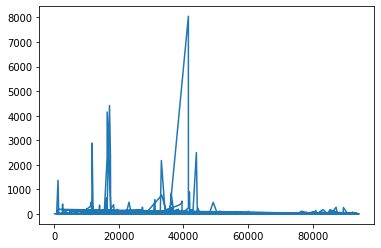

In [164]:
fresh_users['time_diff_min'] = fresh_users['time_diff'].dt.hour * 60 + fresh_users['time_diff'].dt.minute
fresh_users['Avg_tweet'] = fresh_users['user.statuses_count']/fresh_users['time_diff_min']
fresh_users['Avg_tweet'].plot()

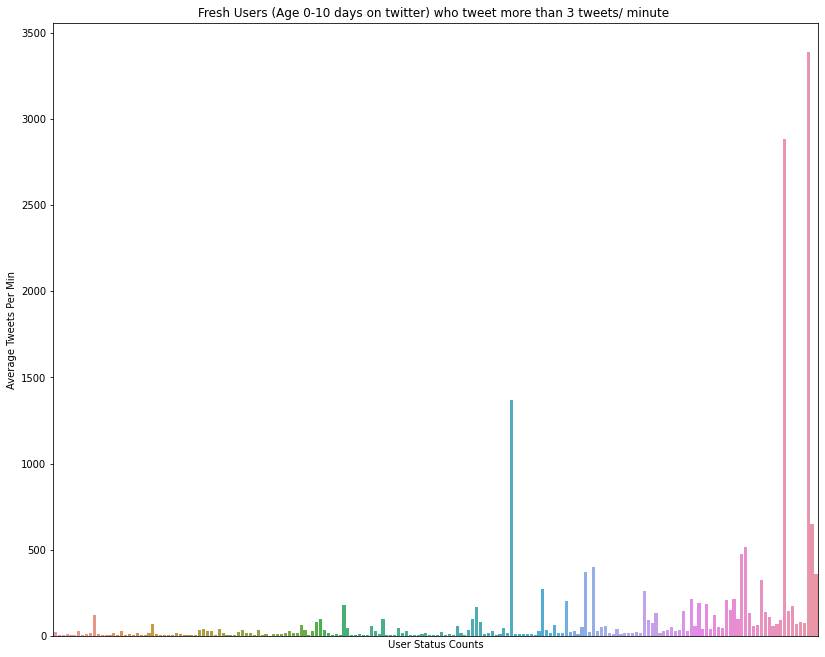

In [165]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 11.27)
snb.barplot(x = 'user.statuses_count',y='Avg_tweet', data = fresh_users[fresh_users['Avg_tweet'] >= 3],ci=None)
plt.xticks([])

plt.xlabel('User Status Counts')
plt.ylabel('Average Tweets Per Min')
plt.title('Fresh Users (Age 0-10 days on twitter) who tweet more than 3 tweets/ minute ')
plt.show()

In [166]:
fresh_users[fresh_users['Avg_tweet'] >= 3].shape[0]

528

#### Number os users who made above 3 tweets / minute is 528

In [167]:
fresh_users.to_csv('fresh_users_high_avg_tweets_19.csv')